In [1]:
library(car)
library(agricolae)

Loading required package: carData
Warning message:
"package 'carData' was built under R version 3.6.3"

In [2]:
a=file.choose()
b=read.table(a,header=F)

In [3]:
apply(b,2,mean)
apply(b,2,sd)

V1    V2    V3    V4 
0.687 0.682 0.571 0.463

V1        V2        V3        V4 
0.2092871 0.1674515 0.1551666 0.1519539

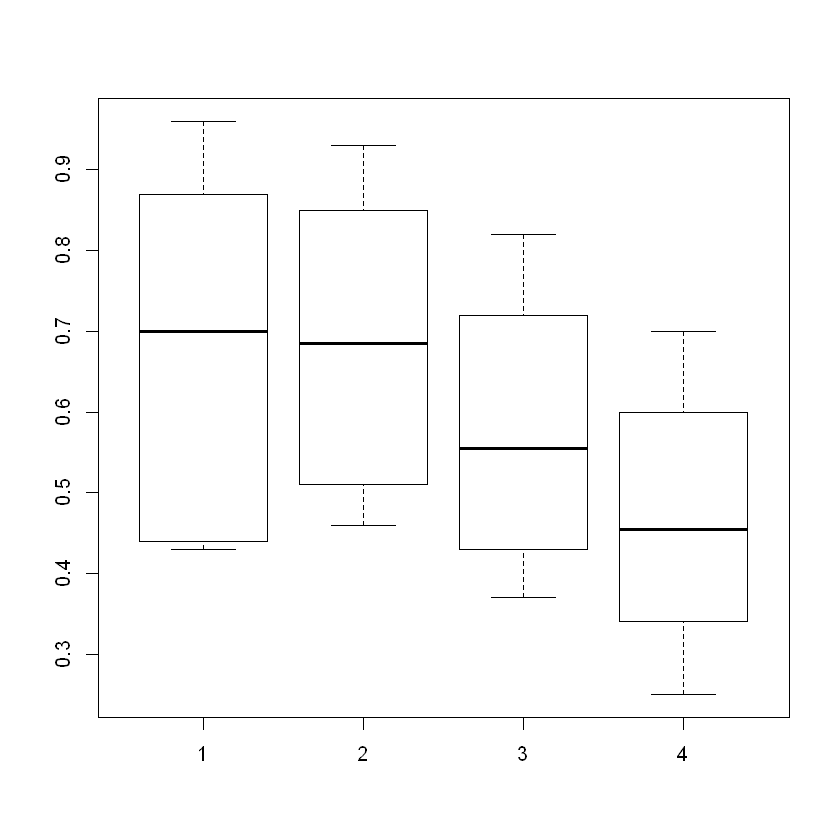

In [4]:
boxplot(b[,1], b[,2], b[,3], b[,4])


	Shapiro-Wilk normality test

data:  b[, 1]
W = 0.8871, p-value = 0.1573


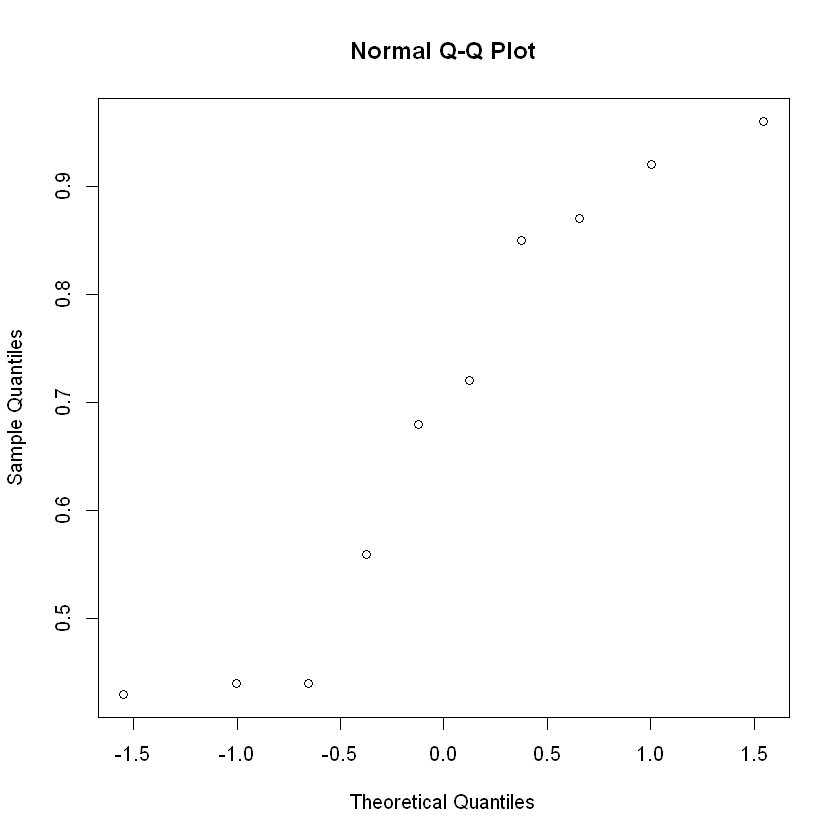


	Shapiro-Wilk normality test

data:  b[, 2]
W = 0.93542, p-value = 0.5032


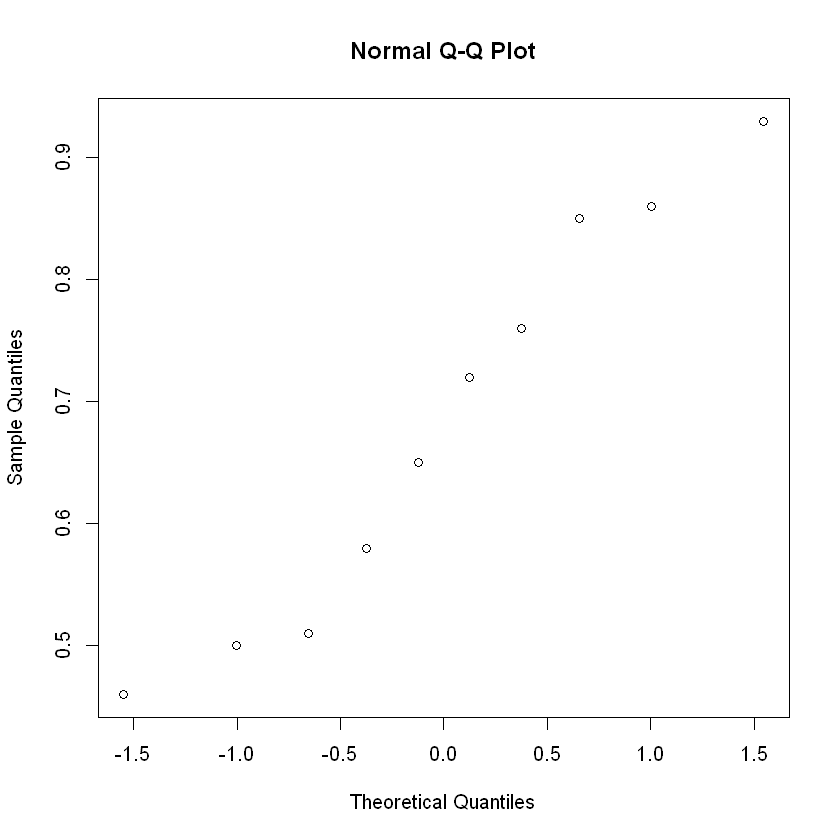


	Shapiro-Wilk normality test

data:  b[, 3]
W = 0.9367, p-value = 0.5169


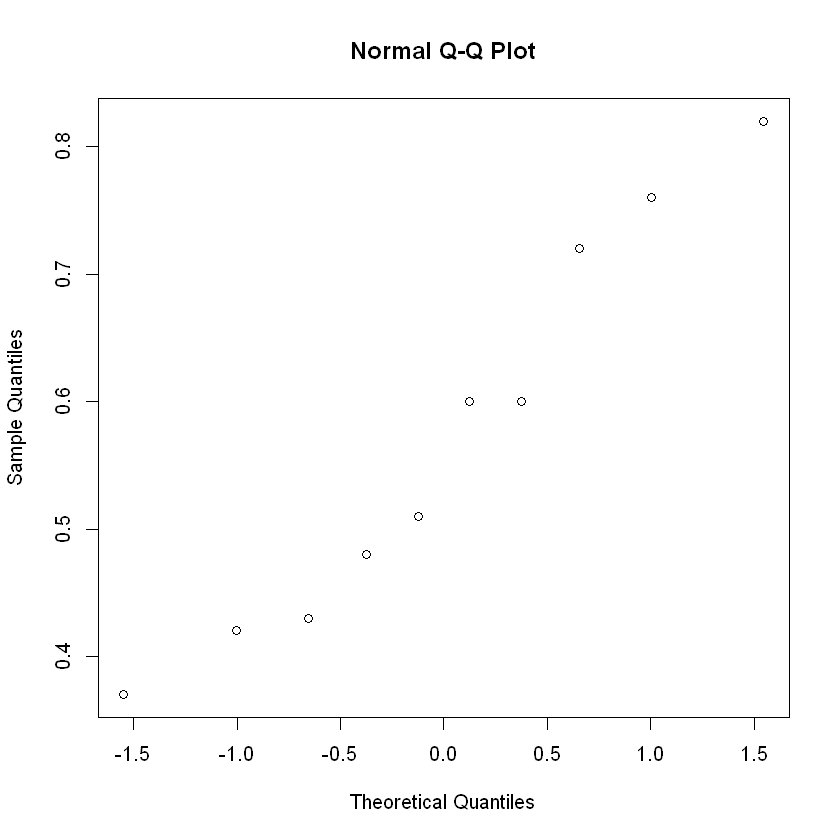


	Shapiro-Wilk normality test

data:  b[, 4]
W = 0.96337, p-value = 0.8235


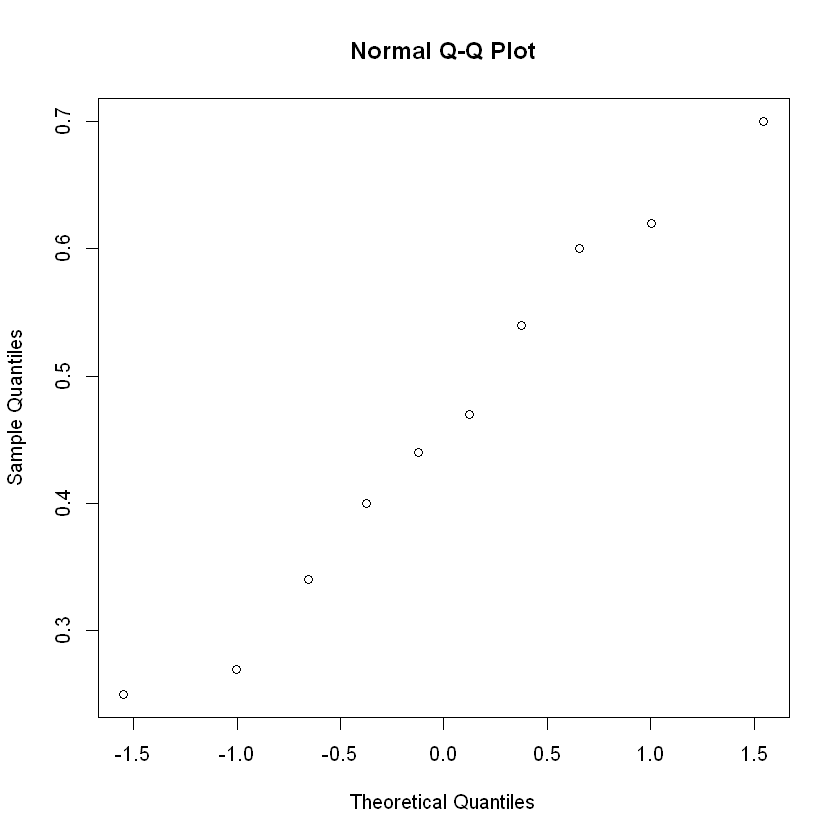

In [5]:
# assumptions
qqnorm(b[,1])
shapiro.test(b[,1])

qqnorm(b[,2])
shapiro.test(b[,2])

qqnorm(b[,3])
shapiro.test(b[,3])

qqnorm(b[,4])
shapiro.test(b[,4])

In [6]:
y=c(as.matrix(b))
k=rep(10,4)
group=rep(1:4,k)

In [7]:
leveneTest(y, group=factor(group), center=mean) 

,Df,F value,Pr(>F)
group,3,0.8821087,0.4595212
,36,NA,NA


In [8]:
# H0 variances are equal

In [9]:
# Levene test is ok,
rr=y-rep(apply(b,2,mean),k)


	Shapiro-Wilk normality test

data:  rr
W = 0.93865, p-value = 0.03114


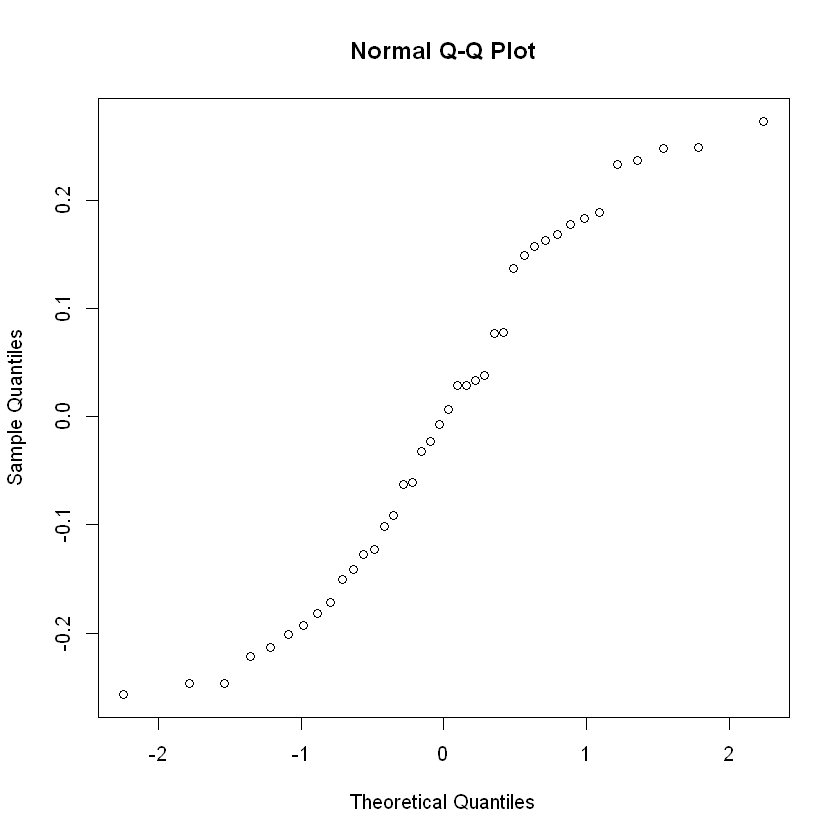

In [10]:
shapiro.test(rr)
qqnorm(rr)

In [11]:
#SS between groups
ssb=10*sum((apply(b,2,mean) - mean(y))^2)

In [12]:
#SS within groups
ssw=sum((y-rep(apply(b,2,mean),k))^2)

In [13]:
# F statistics
F=(ssb/3)/(ssw/4/9)
F

[1] 3.798155

In [14]:
# quantile of F distribution
qf(1-0.05,df1=3,df2=4*9)

[1] 2.866266

In [15]:
# quicker way:

data = data.frame(y = y, group = factor(group))
z=aov(y ~ group, data=data)
summary(z)

            Df Sum Sq Mean Sq F value Pr(>F)  
group        3  0.339 0.11300   3.798 0.0183 *
Residuals   36  1.071 0.02975                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [16]:
## quicher assumptoins
leveneTest(z,center=mean)
shapiro.test(z$res) 

,Df,F value,Pr(>F)
group,3,0.8821087,0.4595212
,36,NA,NA



	Shapiro-Wilk normality test

data:  z$res
W = 0.93865, p-value = 0.03114


In [17]:
########### multiple comparisons between two populations
t.test(b[,1],b[,2])
t.test(b[,3],b[,4])


	Welch Two Sample t-test

data:  b[, 1] and b[, 2]
t = 0.058991, df = 17.173, p-value = 0.9536
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1736887  0.1836887
sample estimates:
mean of x mean of y 
    0.687     0.682 



	Welch Two Sample t-test

data:  b[, 3] and b[, 4]
t = 1.5726, df = 17.992, p-value = 0.1332
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.03629163  0.25229163
sample estimates:
mean of x mean of y 
    0.571     0.463 


In [18]:
# for multiple populatoins
?pairwise.t.test

In [19]:
pairwise.t.test(y, group, p.adj = "none", pool.sd=FALSE)


	Pairwise comparisons using t tests with non-pooled SD 

data:  y and group 

  1      2      3     
2 0.9536 -      -     
3 0.1776 0.1416 -     
4 0.0143 0.0068 0.1332

P value adjustment method: none 

In [20]:
pairwise.t.test(y, group, p.adj = "none", pool.sd=TRUE)


	Pairwise comparisons using t tests with pooled SD 

data:  y and group 

  1      2      3     
2 0.9487 -      -     
3 0.1414 0.1588 -     
4 0.0063 0.0074 0.1701

P value adjustment method: none 

In [21]:
# Bonferoni
pairwise.t.test(y, group, p.adj = "bonf", pool.sd=TRUE)


	Pairwise comparisons using t tests with pooled SD 

data:  y and group 

  1     2     3    
2 1.000 -     -    
3 0.848 0.953 -    
4 0.038 0.044 1.000

P value adjustment method: bonferroni 

In [22]:
# Holm
pairwise.t.test(y, group, p.adj = "holm")


	Pairwise comparisons using t tests with pooled SD 

data:  y and group 

  1     2     3    
2 0.949 -     -    
3 0.565 0.565 -    
4 0.038 0.038 0.565

P value adjustment method: holm 

In [23]:
#Tukey Honest Significant Differences test
TukeyHSD(z)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = y ~ group, data = data)

$group
      diff        lwr         upr     p adj
2-1 -0.005 -0.2127522  0.20275221 0.9999003
3-1 -0.116 -0.3237522  0.09175221 0.4458334
4-1 -0.224 -0.4317522 -0.01624779 0.0304448
3-2 -0.111 -0.3187522  0.09675221 0.4840795
4-2 -0.219 -0.4267522 -0.01124779 0.0355643
4-3 -0.108 -0.3157522  0.09975221 0.5075095


In [24]:
# difference between:
# 1 and 4; 
# 2 and 4 